<span id="toc"></span>

# Bike Sharing Dataset


- [Dataset](#dataset)
- [EDA](#EDA)
- [Feature Engineering](#feature-engineering)
- [Regression Model](#regression)

<span id="dataset"></span>

## Dataset
### Downloaded from: https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset


Attribute Information:

Both hour.csv and day.csv have the following fields, except hr which is not available in day.csv

- instant: record index
- dteday: date
- season: season 
    - 1: winter
    - 2: spring
    - 3: summer 
    - 4: fall
- yr: year (0: 2011, 1: 2012)
- mnth: month (1 to 12)
- hr: hour (0 to 23)
- holiday: weather day is holiday or not (extracted from [http://dchr.dc.gov/page/holiday-schedule])
- weekday: day of the week
- workingday: if day is neither weekend nor holiday is 1, otherwise is 0.
+ weathersit :
    - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
    - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- temp: Normalized temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-8, t_max=+39 (only in hourly scale)
- atemp: Normalized feeling temperature in Celsius. The values are derived via (t-t_min)/(t_max-t_min), t_min=-16, t_max=+50 (only in hourly scale)
- hum: Normalized humidity. The values are divided to 100 (max)
- windspeed: Normalized wind speed. The values are divided to 67 (max)
- casual: count of casual users
- registered: count of registered users
- cnt: count of total rental bikes including both casual and registered


In [1]:
# Import basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import ML stuff
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import PoissonRegressor
from sklearn.metrics import mean_squared_error


# Other libraries
from math import sqrt

In [3]:
# Load the dataset (let's use 'hour.csv' since it has more fine-grained than )
df_bikeShare_hr = pd.read_csv("hour.csv")

<span id="EDA"></span>

## EDA

In [4]:
# Various quick looks at the structure and content of the dataset
df_bikeShare_hr.T

,0,1,2,3,4,5,6,7,8,9,...,17369,17370,17371,17372,17373,17374,17375,17376,17377,17378
instant,1,2,3,4,5,6,7,8,9,10,...,17370,17371,17372,17373,17374,17375,17376,17377,17378,17379
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,...,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31
season,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
yr,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
mnth,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weekday,6,6,6,6,6,6,6,6,6,6,...,1,1,1,1,1,1,1,1,1,1
workingday,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
weathersit,1,1,1,1,1,2,1,1,1,1,...,2,2,2,2,2,2,2,1,1,1


In [5]:
df_bikeShare_hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [6]:
df_bikeShare_hr.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
instant,17379.0,NaN,NaN,NaN,8690.0,5017.0295,1.0,4345.5,8690.0,13034.5,17379.0
dteday,17379,731,2011-01-01,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17379.0,NaN,NaN,NaN,2.50164,1.106918,1.0,2.0,3.0,3.0,4.0
yr,17379.0,NaN,NaN,NaN,0.502561,0.500008,0.0,0.0,1.0,1.0,1.0
mnth,17379.0,NaN,NaN,NaN,6.537775,3.438776,1.0,4.0,7.0,10.0,12.0
hr,17379.0,NaN,NaN,NaN,11.546752,6.914405,0.0,6.0,12.0,18.0,23.0
holiday,17379.0,NaN,NaN,NaN,0.02877,0.167165,0.0,0.0,0.0,0.0,1.0
weekday,17379.0,NaN,NaN,NaN,3.003683,2.005771,0.0,1.0,3.0,5.0,6.0
workingday,17379.0,NaN,NaN,NaN,0.682721,0.465431,0.0,0.0,1.0,1.0,1.0
weathersit,17379.0,NaN,NaN,NaN,1.425283,0.639357,1.0,1.0,1.0,2.0,4.0


In [7]:
# Sanity check

# Proportion of NULL / missing values
df_bikeShare_hr.isnull().sum()/df_bikeShare_hr.shape[0]

instant       0.0
dteday        0.0
season        0.0
yr            0.0
mnth          0.0
hr            0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
casual        0.0
registered    0.0
cnt           0.0
dtype: float64

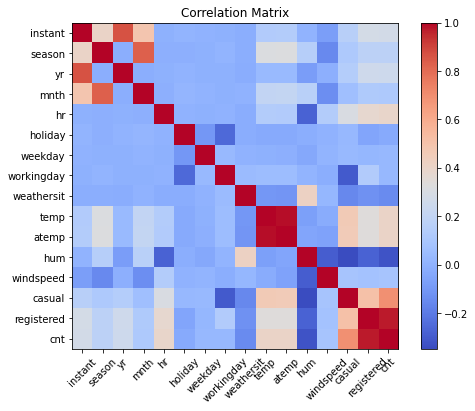

In [8]:
# Correlation among various variables
correlation_matrix = df_bikeShare_hr.corr()

plt.figure(figsize=(8, 6))  # Adjust the figsize as needed
plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
tick_marks = range(len(correlation_matrix.columns))
plt.xticks(tick_marks, correlation_matrix.columns, rotation=45)
plt.yticks(tick_marks, correlation_matrix.columns)
plt.title('Correlation Matrix')
plt.show()

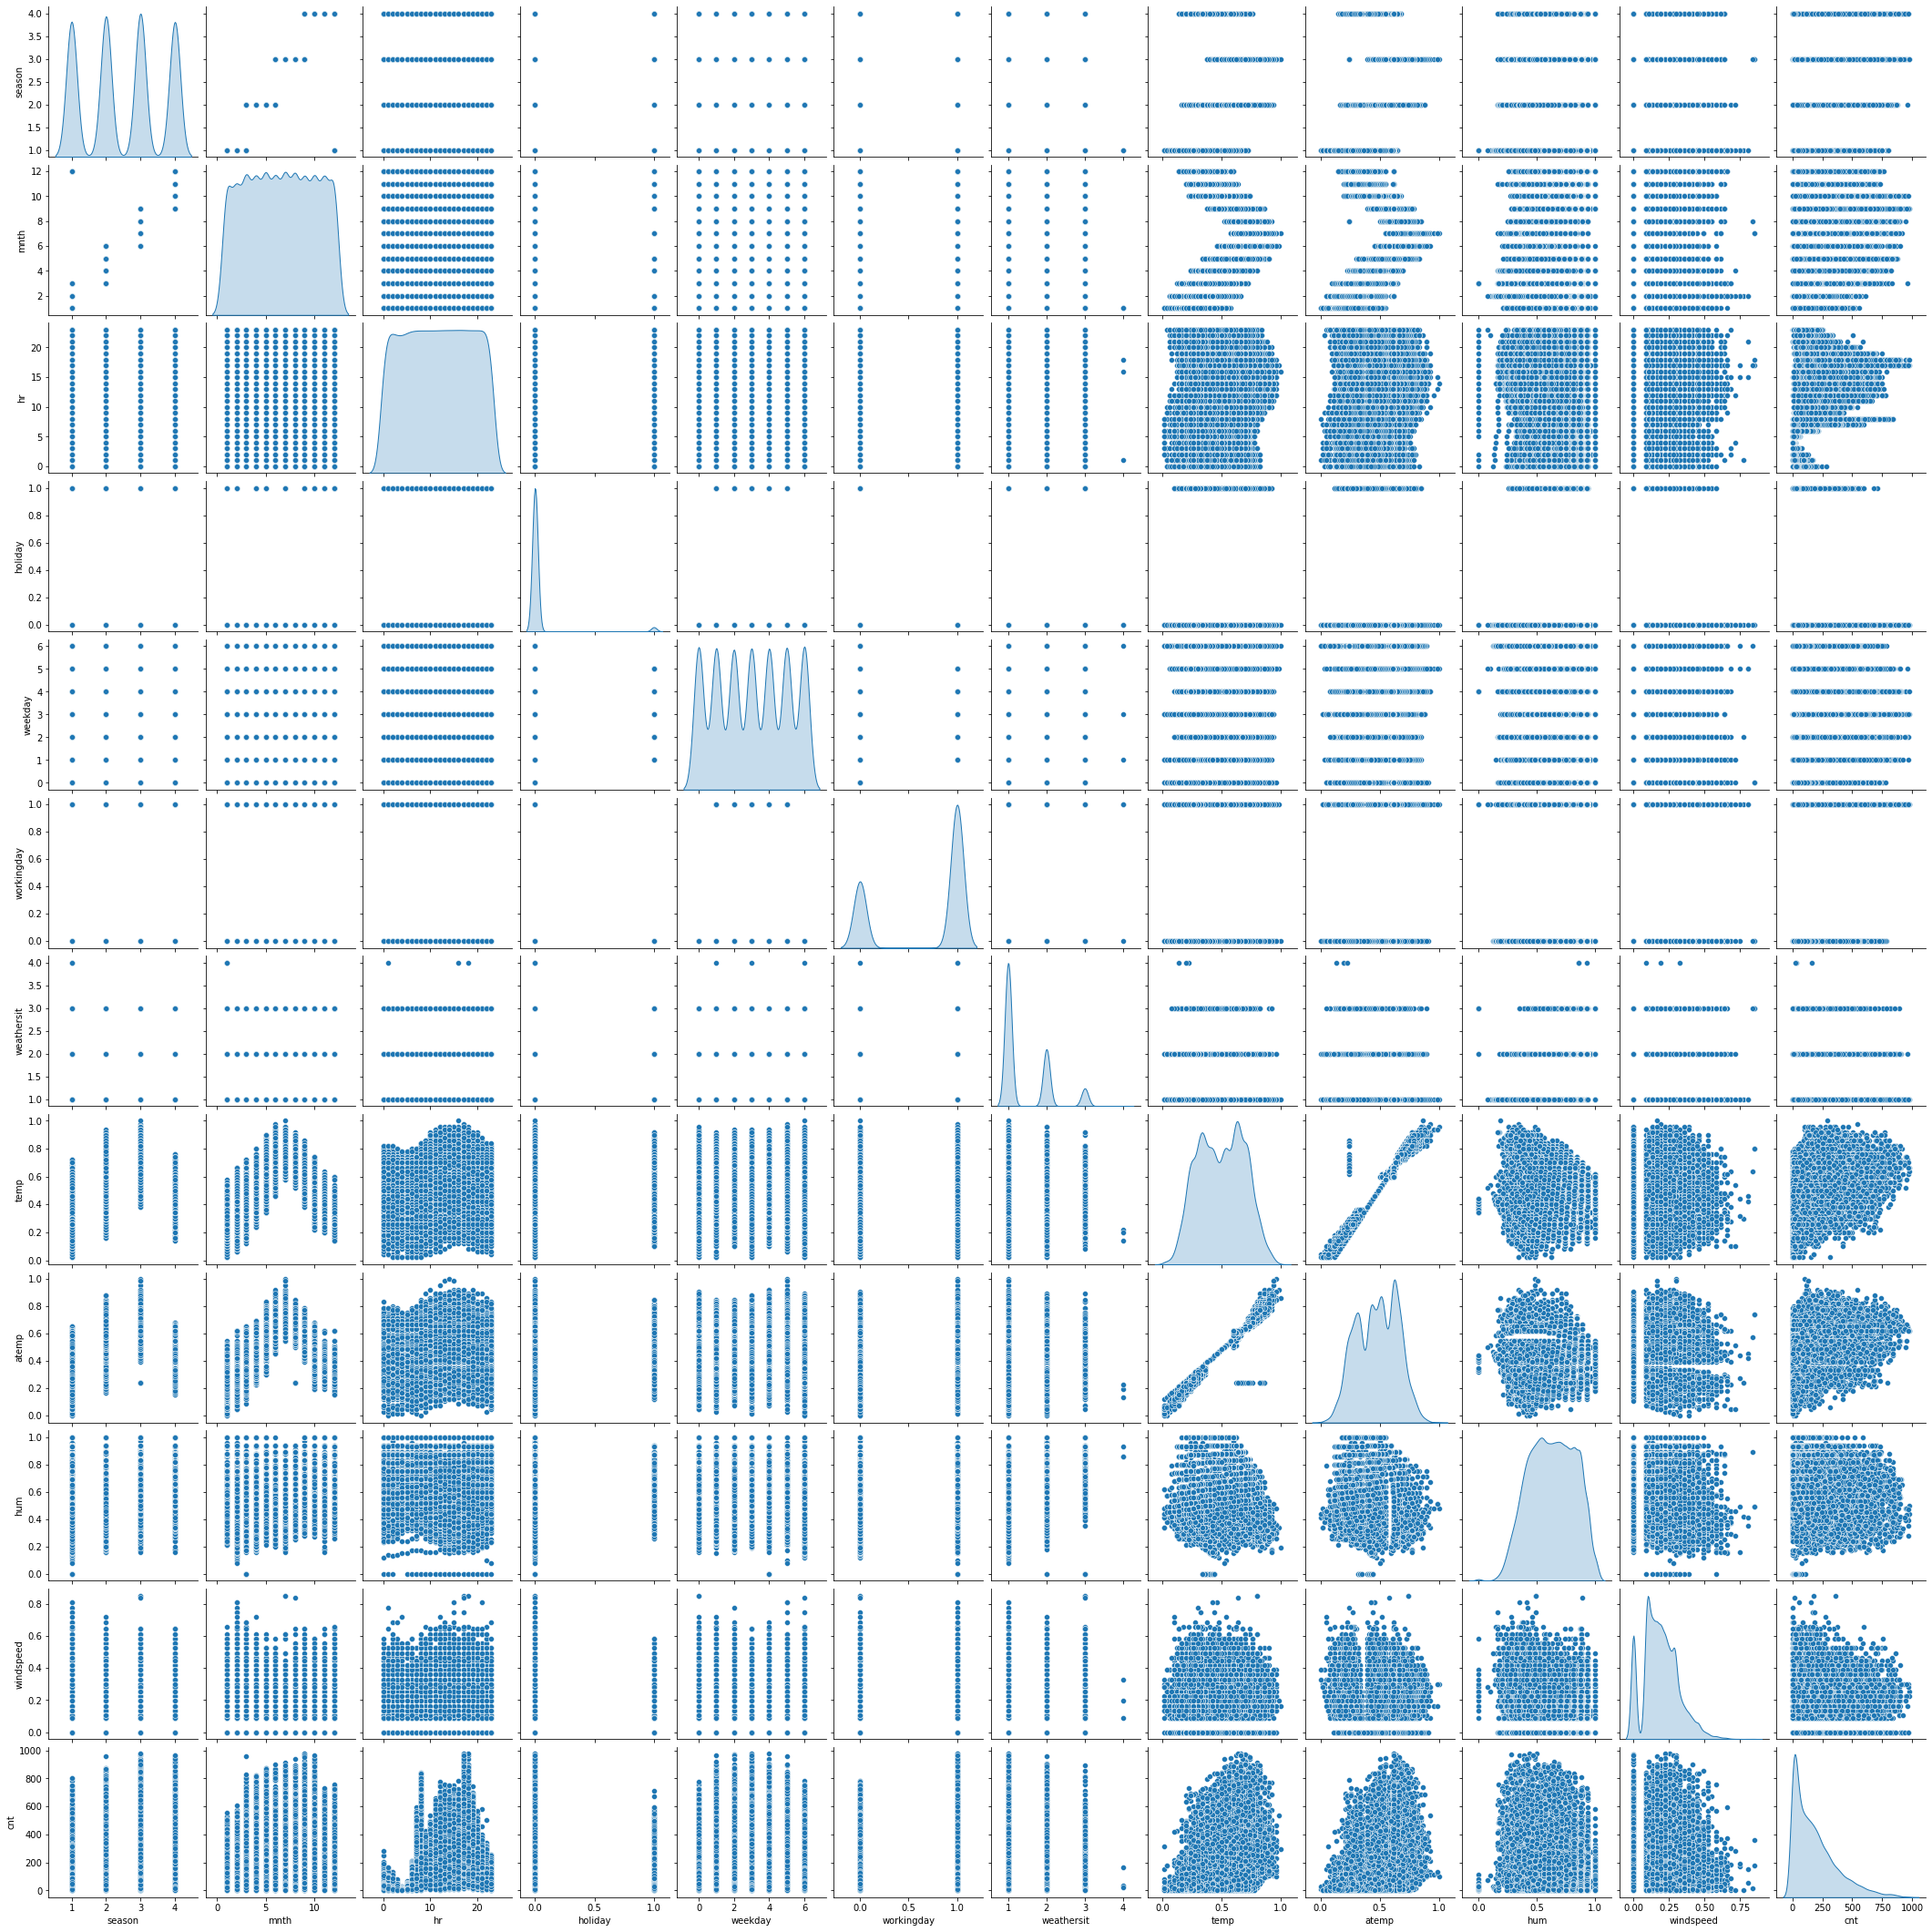

In [9]:
# Plot pairwise relationships between the relevant variables in the dataset as scatterplots

sns.pairplot(data=df_bikeShare_hr.drop(columns=['instant', 'dteday', 'yr', 'casual', 'registered'], axis=1), 
             diag_kind='kde')


### How does the _mean count by hour_ vary across ``weekday``, ``workingday`` and ``holiday``?

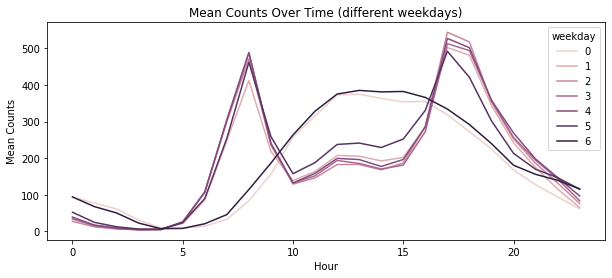

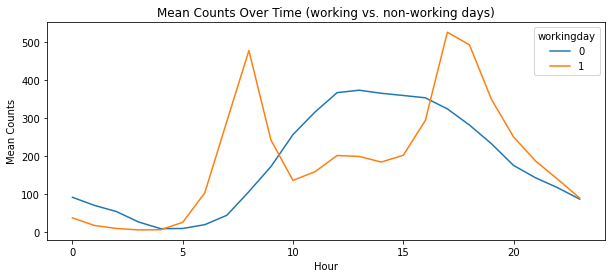

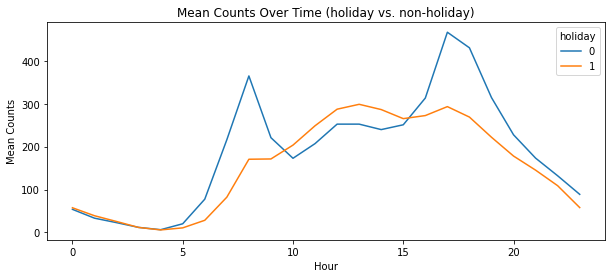

In [10]:
# Calculate the mean counts
mean_counts = df_bikeShare_hr.groupby(['weekday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 4))  # Adjust the figsize as needed

# Create line plot with different lines for different groups
sns.lineplot(data=mean_counts, x='hr', y='cnt', hue='weekday')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Counts')
plt.title('Mean Counts Over Time (different weekdays)')

# Show the plot
plt.show()


# Calculate the mean counts
mean_counts = df_bikeShare_hr.groupby(['workingday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 4))  # Adjust the figsize as needed

# Create line plot with different lines for different groups
sns.lineplot(data=mean_counts, x='hr', y='cnt', hue='workingday')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Counts')
plt.title('Mean Counts Over Time (working vs. non-working days)')

# Show the plot
plt.show()

# Calculate the mean counts
mean_counts = df_bikeShare_hr.groupby(['holiday', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 4))  # Adjust the figsize as needed

# Create line plot with different lines for different groups
sns.lineplot(data=mean_counts, x='hr', y='cnt', hue='holiday')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Counts')
plt.title('Mean Counts Over Time (holiday vs. non-holiday)')

# Show the plot
plt.show()


#### => It seems the _mean count by hour_ interacts with ``weekday``, ``workingday`` and ``holiday``

<br>

### How does the _mean count by hour_ by hour vary across ``mnth`` (month) and ``seasons``?

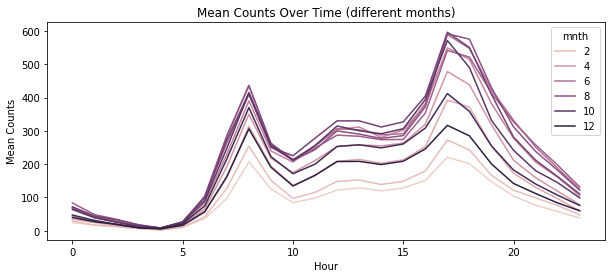

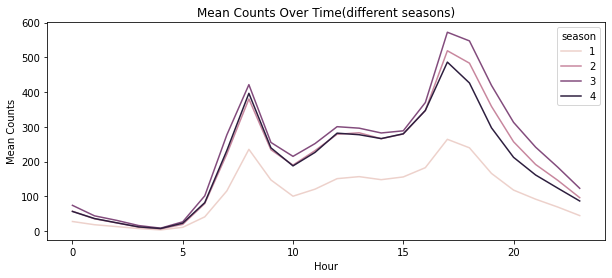

In [11]:
# Calculate the mean counts
mean_counts = df_bikeShare_hr.groupby(['mnth', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 4))  # Adjust the figsize as needed

# Create line plot with different lines for different groups
sns.lineplot(data=mean_counts, x='hr', y='cnt', hue='mnth')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Counts')
plt.title('Mean Counts Over Time (different months)')

# Show the plot
plt.show()


# Calculate the mean counts
mean_counts = df_bikeShare_hr.groupby(['season', 'hr'])['cnt'].mean().reset_index()

plt.figure(figsize=(10, 4))  # Adjust the figsize as needed

# Create line plot with different lines for different groups
sns.lineplot(data=mean_counts, x='hr', y='cnt', hue='season')

# Set labels and title
plt.xlabel('Hour')
plt.ylabel('Mean Counts')
plt.title('Mean Counts Over Time(different seasons)')

# Show the plot
plt.show()



#### => It seems ``mnth`` (month) and ``seasons`` have linear effect on  the _mean count by hour_

<br>

<span id="feature-engineering"></span>

[TOC](#toc)

## Feature Engineering

In [12]:
df_bikeShare_hr.T

,0,1,2,3,4,5,6,7,8,9,...,17369,17370,17371,17372,17373,17374,17375,17376,17377,17378
instant,1,2,3,4,5,6,7,8,9,10,...,17370,17371,17372,17373,17374,17375,17376,17377,17378,17379
dteday,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,2011-01-01,...,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31,2012-12-31
season,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
yr,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
mnth,1,1,1,1,1,1,1,1,1,1,...,12,12,12,12,12,12,12,12,12,12
hr,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
holiday,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
weekday,6,6,6,6,6,6,6,6,6,6,...,1,1,1,1,1,1,1,1,1,1
workingday,0,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1
weathersit,1,1,1,1,1,2,1,1,1,1,...,2,2,2,2,2,2,2,1,1,1


### 1. Drop redundant columns


In [13]:
# - Drop 'instant' since it's only the index
# - A particulare day / date is redundant (for prediction) since a day never repeats
# - Drop 'yr' since, it's not very informative since we have data only for two years and 
#   a year will never occur again
# - Drop 'casual' and 'registered' since 'cnt' =  'casual' + 'registered'

# Separate DV and IVs

X = df_bikeShare_hr.drop(columns=['cnt', 'instant', 'dteday', 'yr', 'casual', 'registered'])

y = df_bikeShare_hr['cnt']

In [14]:
# Sanity check
X.T

,0,1,2,3,4,5,6,7,8,9,...,17369,17370,17371,17372,17373,17374,17375,17376,17377,17378
season,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
mnth,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000,12.0000
hr,0.0000,1.0000,2.0000,3.0000,4.0000,5.0000,6.0000,7.0000,8.0000,9.0000,...,14.0000,15.0000,16.0000,17.0000,18.0000,19.0000,20.0000,21.0000,22.0000,23.0000
holiday,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
weekday,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
workingday,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
weathersit,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,...,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
temp,0.2400,0.2200,0.2200,0.2400,0.2400,0.2400,0.2200,0.2000,0.2400,0.3200,...,0.2800,0.2800,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600
atemp,0.2879,0.2727,0.2727,0.2879,0.2879,0.2576,0.2727,0.2576,0.2879,0.3485,...,0.2727,0.2879,0.2576,0.2879,0.2727,0.2576,0.2576,0.2576,0.2727,0.2727
hum,0.8100,0.8000,0.8000,0.7500,0.7500,0.7500,0.8000,0.8600,0.7500,0.7600,...,0.4500,0.4500,0.4800,0.4800,0.4800,0.6000,0.6000,0.6000,0.5600,0.6500


In [15]:
# In the EDA we saw clearly that there is an interaction between 'hr' and 
# each of {'workingday', 'holiday', 'weekday'}
# 
# Add interaction terms for each of the interaction

X['hr_X_workday'] = X['hr'] * X['workingday']
X['hr_X_holiday'] = X['hr'] * X['holiday']
X['hr_X_weekday'] = X['hr'] * X['weekday']

### 2. Dummy-code categorical variables


In [16]:
X = pd.get_dummies(X, columns=['hr', 'workingday', 'hr_X_workday', 'hr_X_holiday', 'hr_X_weekday', 'mnth', 'season'], 
                                 drop_first=True)


In [17]:
# Sanity check
X.T

,0,1,2,3,4,5,6,7,8,9,...,17369,17370,17371,17372,17373,17374,17375,17376,17377,17378
holiday,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
weekday,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,6.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
weathersit,1.0000,1.0000,1.0000,1.0000,1.0000,2.0000,1.0000,1.0000,1.0000,1.0000,...,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,2.0000,1.0000,1.0000,1.0000
temp,0.2400,0.2200,0.2200,0.2400,0.2400,0.2400,0.2200,0.2000,0.2400,0.3200,...,0.2800,0.2800,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600,0.2600
atemp,0.2879,0.2727,0.2727,0.2879,0.2879,0.2576,0.2727,0.2576,0.2879,0.3485,...,0.2727,0.2879,0.2576,0.2879,0.2727,0.2576,0.2576,0.2576,0.2727,0.2727
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mnth_11,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
mnth_12,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
season_2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
season_3,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


<br>
<span id="regression"></span>

[TOC](#toc)


## _Poisson_ Regression Model

In [18]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [19]:
# Create and fit a Poisson regression model
reg = PoissonRegressor(max_iter=1000)
reg.fit(X_train, y_train)

PoissonRegressor(max_iter=1000)

In [20]:
# Calculate and report R-squared score on the test set
r_squared = reg.score(X_test, y_test)

# Print the R-squared score
print("R squared:", r_squared)

R squared: 0.8104863755982701


In [21]:
# Calculate and report the RMSE:

# Make predictions on the test set
y_pred = reg.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = sqrt(mse)

# Print the RMSE
print("RMSE:", rmse)

RMSE: 85.42860602095766


<br>
<br>
